# 라쏘 (Lasso)

- L1 규제를 사용하는 선형모델

## L1 규제

- 회귀계수 W 에 절대값을 취해 비용함수에 페널티를 부여한다.
- 비용함수 = $RSS(W) + alpha * ||W||_1$
- 회귀계수 W 의 값을 급격하게 감소시켜 0으로 만들고 제거한다.
- 이는 피처 셀렉션의 특성을 갖게한다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 보스턴 주택가격 예측

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
y_target = boston_df['PRICE']

lasso = Lasso(alpha=10)
neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-27.786 -46.397 -80.323 -61.56  -16.302]
5 folds 의 개별 RMSE scores: [5.271 6.812 8.962 7.846 4.038]
5 folds 의 평균 RMSE: 6.586


#### alpha 값을 0, 0.1, 1, 10, 100 으로 변경하며 RMSE 측정

In [4]:
alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    
    neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    
    print('alpha {0} 일때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0.07 일때 5 folds 의 평균 RMSE: 5.612
alpha 0.1 일때 5 folds 의 평균 RMSE: 5.615
alpha 0.5 일때 5 folds 의 평균 RMSE: 5.669
alpha 1 일때 5 folds 의 평균 RMSE: 5.776
alpha 3 일때 5 folds 의 평균 RMSE: 6.189


#### alpha 에 따른 회귀계수 값을 시각화

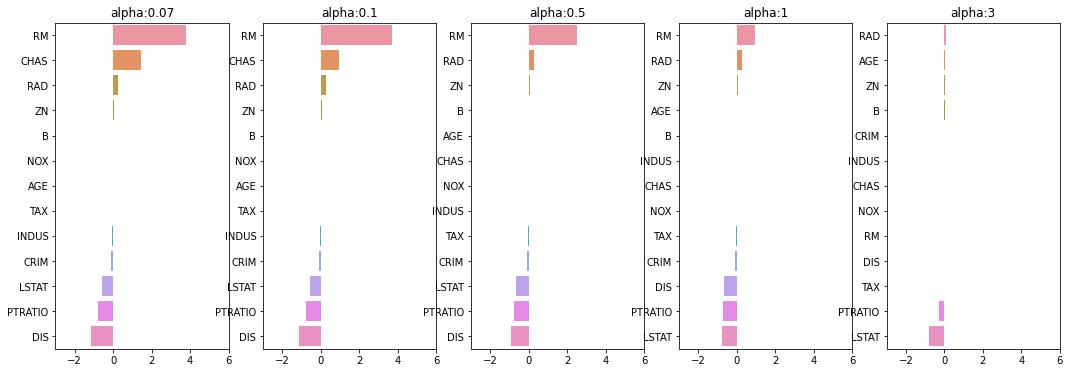

In [5]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coef_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_data, y_target)
    coef = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])

plt.show()

#### alpha 에 따른 컬럼별 회귀계수 출력

In [6]:
sort_column = 'alpha:' + str(alphas[0])
coef_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### 공통모듈을 만들어 처리

In [7]:
from modules.evaluation import get_linear_reg_eval

In [8]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coef_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07 일때 5 폴드세트의 평균 RMSE: 5.612
alpha 0.1 일때 5 폴드세트의 평균 RMSE: 5.615
alpha 0.5 일때 5 폴드세트의 평균 RMSE: 5.669
alpha 1 일때 5 폴드세트의 평균 RMSE: 5.776
alpha 3 일때 5 폴드세트의 평균 RMSE: 6.189
